# Sargasso Sea Map Plotting 
1. 10 Years Annual
2. 10 Years January
3. 10 Years February
4. .. March
5. .. April
6. .. May
7. .. June
8. .. July
9. .. August
10. .. September
11. .. October
12. .. November
13. .. December

In [3]:
"""
!pip install gcsfs
!pip install zarr 
!pip install xarray[complete]
!pip install ecmwflibs
!pip install rioxarray
!pip install geopandas
!pip install cfgrib
!pip install netCDF4
"""

'\n!pip install gcsfs\n!pip install zarr \n!pip install xarray[complete]\n!pip install ecmwflibs\n!pip install rioxarray\n!pip install geopandas\n!pip install cfgrib\n!pip install netCDF4\n'

In [96]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import netCDF4
import rioxarray
import xarray as xr
import zarr
import fsspec
import gcsfs
import rioxarray as rio 
import ecmwflibs
import cfgrib
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### 10 Years Annual
1. sst245_short_diff
2. sst245_long_diff
3. sst370_short_diff
4. sst370_long_diff
5. sst585_short_diff
6. sst585_long_diff

In [118]:
path = "../data/tos/sargasso/"
# read SSP245
short_245 = xr.open_rasterio(path + "sst245_short_diff.tiff")
short_245 = short_245.to_dataset('band')
short_245 = short_245.rename({1:'tos'})
short_245 = short_245.rio.write_crs(4326, inplace=True)

long_245 = xr.open_rasterio(path + "sst245_long_diff.tiff")
long_245 = long_245.to_dataset('band')
long_245 = long_245.rename({1:'tos'})
long_245 = long_245.rio.write_crs(4326, inplace=True)

# read SSP370
short_370 = xr.open_rasterio(path + "sst370_short_diff.tiff")
short_370 = short_370.to_dataset('band')
short_370 = short_370.rename({1:'tos'})
short_370 = short_370.rio.write_crs(4326, inplace=True)

long_370 = xr.open_rasterio(path + "sst370_long_diff.tiff")
long_370 = long_370.to_dataset('band')
long_370 = long_370.rename({1:'tos'})
long_370 = long_370.rio.write_crs(4326, inplace=True)

# read SSP585
short_585 = xr.open_rasterio(path + "sst585_short_diff.tiff")
short_585 = short_585.to_dataset('band')
short_585 = short_585.rename({1:'tos'})
short_585 = short_585.rio.write_crs(4326, inplace=True)

long_585 = xr.open_rasterio(path + "sst585_long_diff.tiff")
long_585 = long_585.to_dataset('band')
long_585 = long_585.rename({1:'tos'})
long_585 = long_585.rio.write_crs(4326, inplace=True)

In [119]:
# read eez and area of collaboration
bound_path = "../data/boundaries/"
eez = gpd.read_file(bound_path + "eez_boundaries_v11.shp")
#eez = eez.to_crs('epsg:4326')
gac = gpd.read_file(bound_path + "SargassoSea_Geographical_Area_of_Collaboration.shp")
gac = gac.to_crs('epsg:4326')

In [58]:
"""
labels = ['0.7 g/m$^2$', '0.4 g/m$^2$']
for i in range(len(labels)): 
    CS.collections[i].set_label(labels[i])
plt.legend(loc='lower left',prop={'size': 6})
"""

"\nlabels = ['0.7 g/m$^2$', '0.4 g/m$^2$']\nfor i in range(len(labels)): \n    CS.collections[i].set_label(labels[i])\nplt.legend(loc='lower left',prop={'size': 6})\n"

In [122]:
# define plots setting

def plot(datasets, title, fig_title):
    c_colors = ['lime','aqua']
    fig = plt.figure(figsize=(15,6), tight_layout=True)
    title_text = fig_title
    fig.suptitle(title_text)

    for pos, dataset, title in zip(range(1, 7), datasets, title):
        ax = fig.add_subplot(2, 3, pos, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND, zorder=10)
        ax.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)

        dataset.tos.plot(cmap="coolwarm", vmin=-4, vmax=4, add_colorbar=False)
        CS = dataset.tos.plot.contour(levels=[0.5,1,0], colors=c_colors, linewidths=.8, add_labels=True)

        eez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.7, ax=ax)
        gac.plot(edgecolor="grey", facecolor="none", linewidth=0.7, ax=ax) 

        ax.set_xlim(-80, -25) 
        ax.set_ylim(10,45)
        ax.set_title(title)
        
    return fig

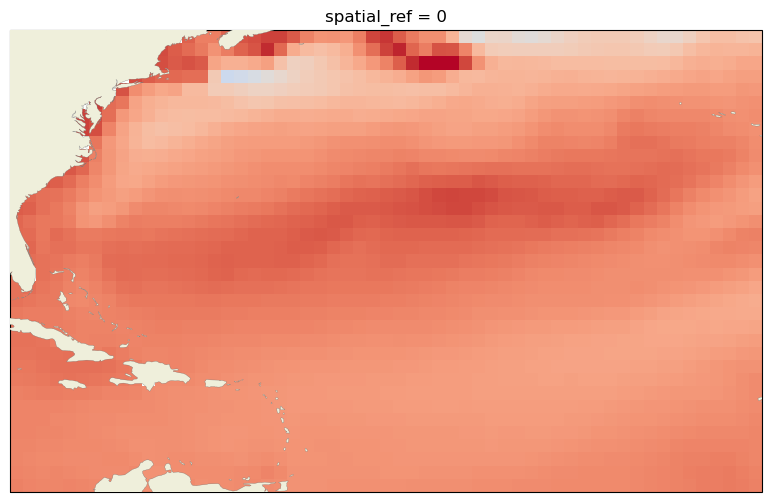

In [125]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=10)
ax.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)
dataset.tos.plot(cmap="coolwarm", vmin=-4, vmax=4, add_colorbar=False, ax=ax)

In [108]:
fig = plt.figure(figsize=(15,6), tight_layout=True)

<Figure size 1500x600 with 0 Axes>

### Plot 10 Year Mean

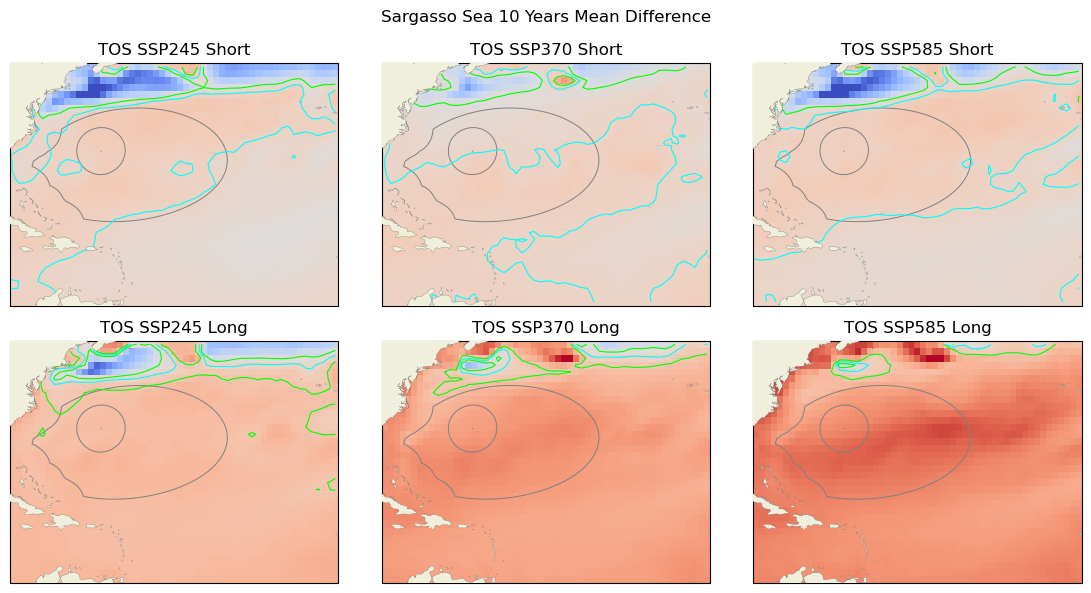

In [123]:
fig_title = 'Sargasso Sea 10 Years Mean Difference'
datasets = [short_245, short_370, short_585, long_245, long_370, long_585]
title = ["TOS SSP245 Short", "TOS SSP370 Short", "TOS SSP585 Short",
         "TOS SSP245 Long", "TOS SSP370 Long", "TOS SSP585 Long"]

fig = plot(datasets, title, fig_title)

# define save path
save_path = "../outputs/sargasso"
fig_name = "sargasso_tos_10_years_mean_diff.jpg"
fig.savefig(save_path + fig_name)

### Plot 12 months

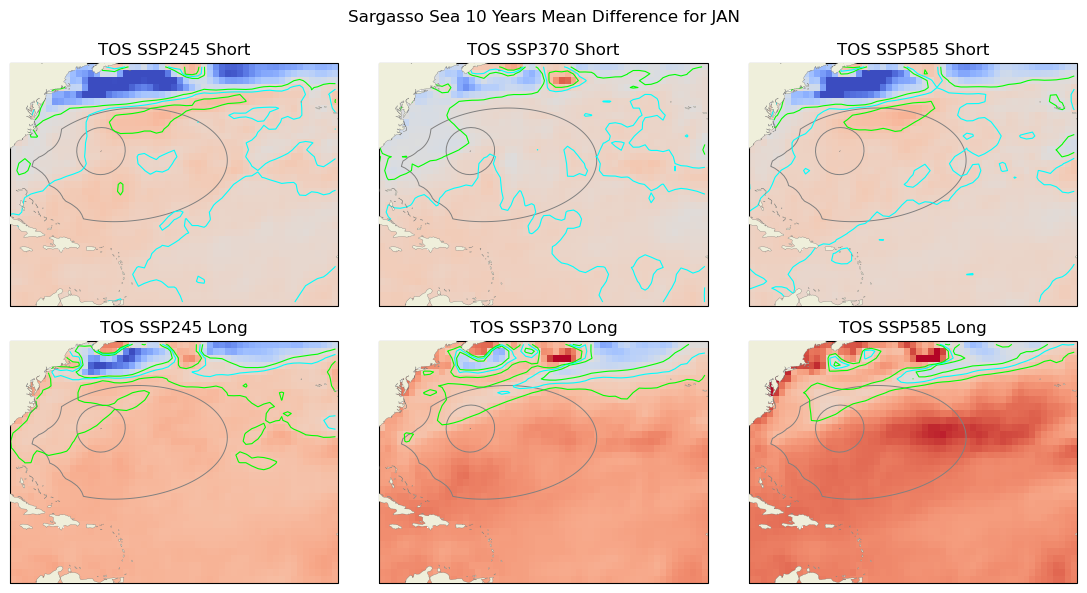

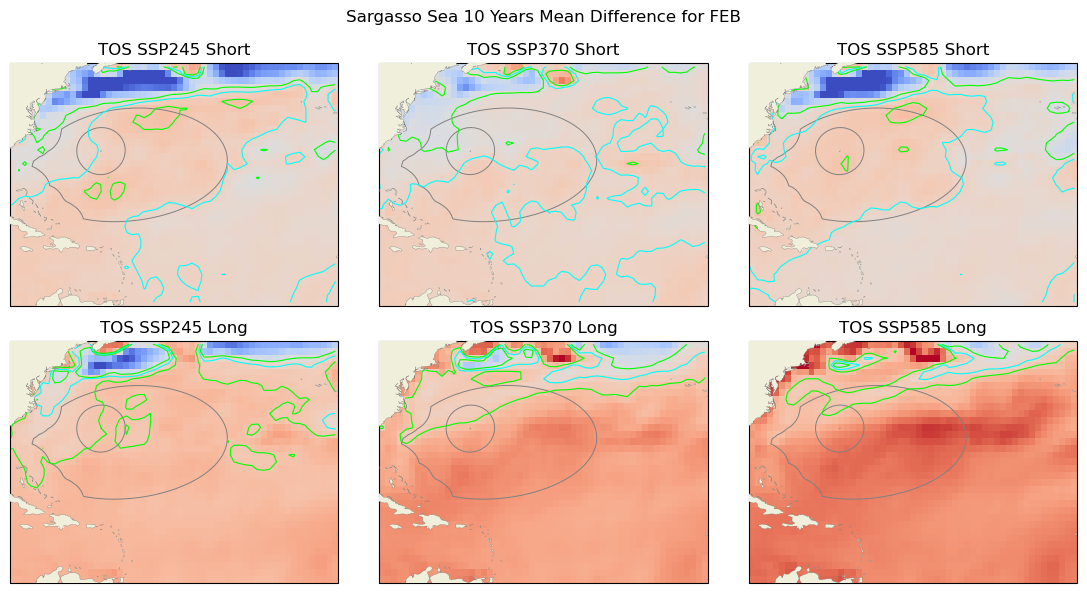

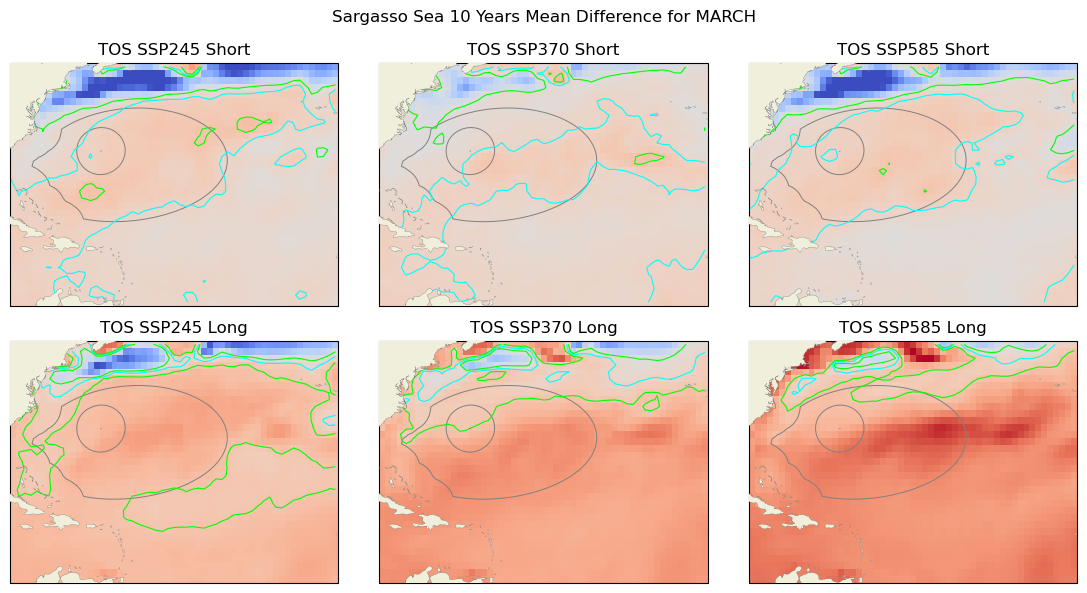

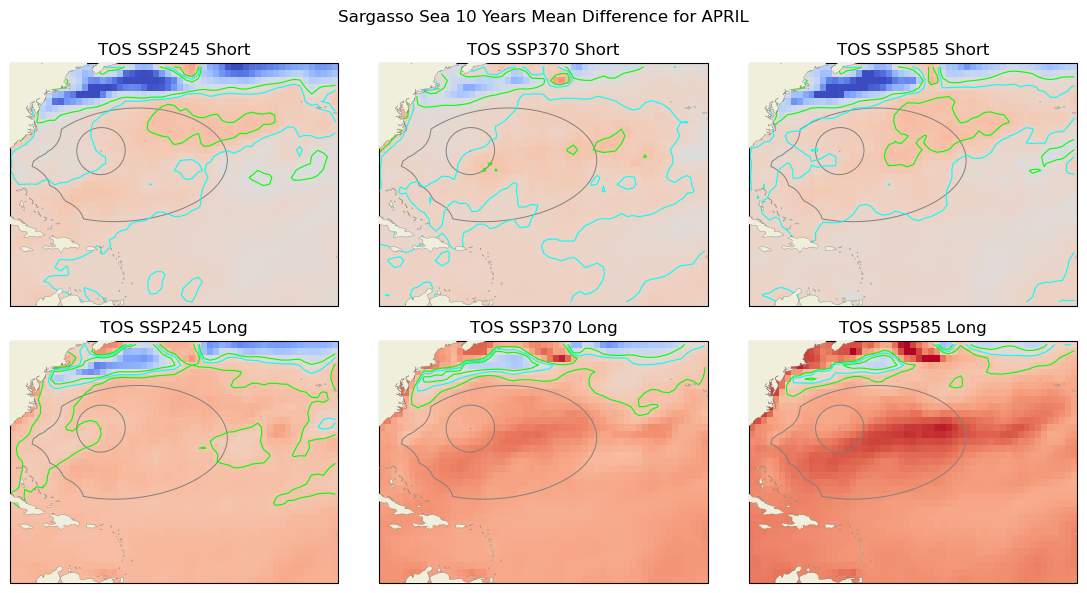

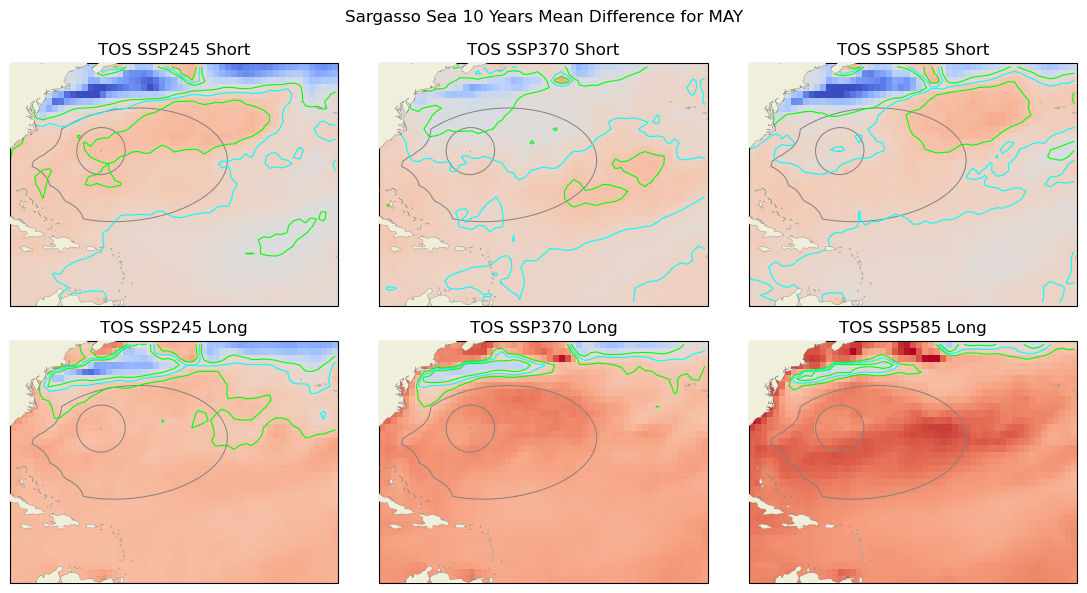

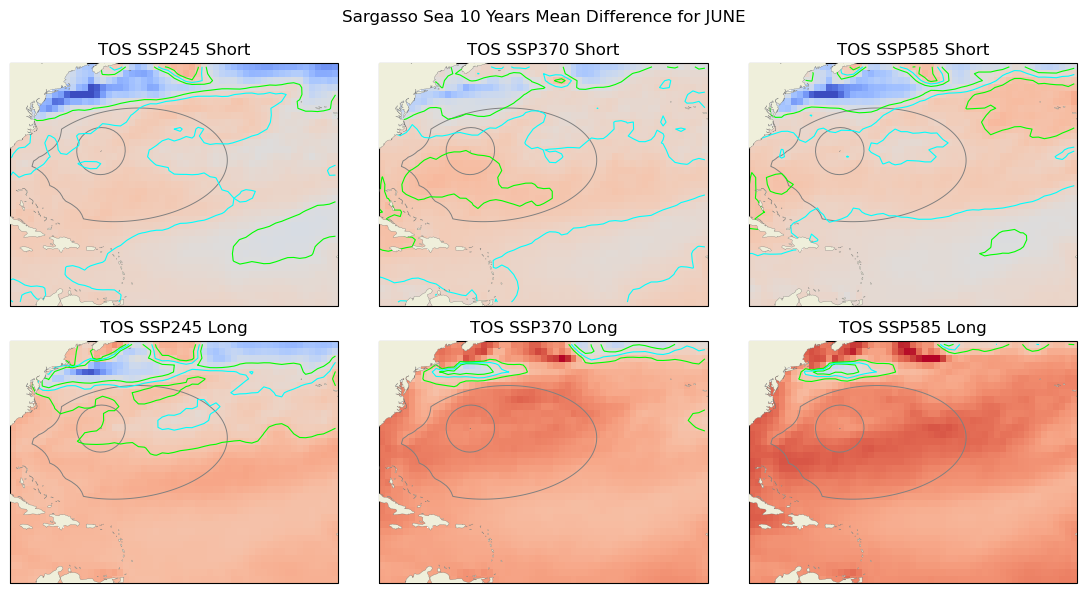

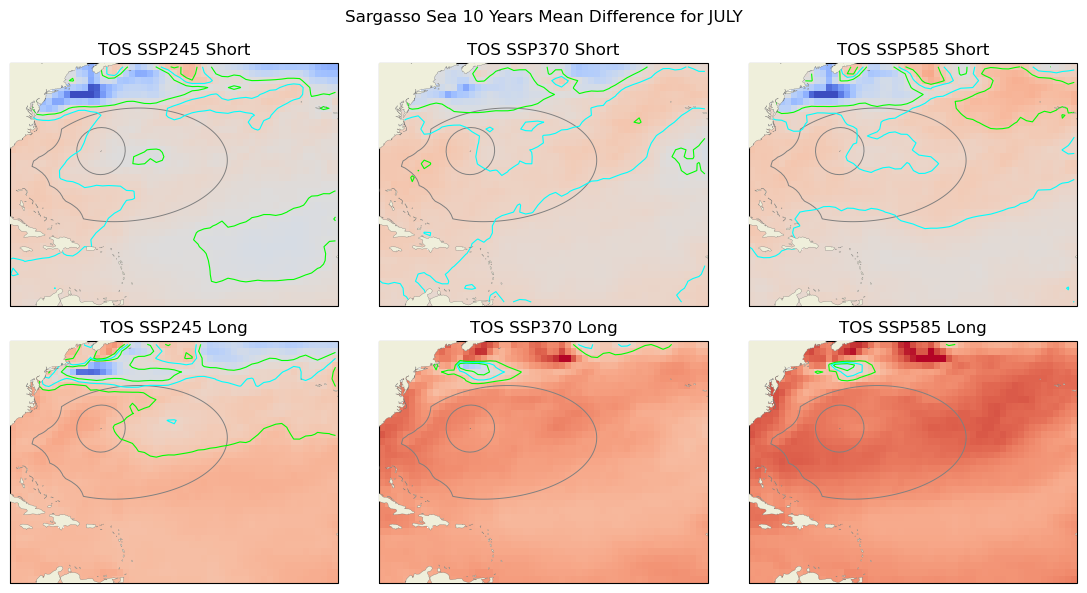

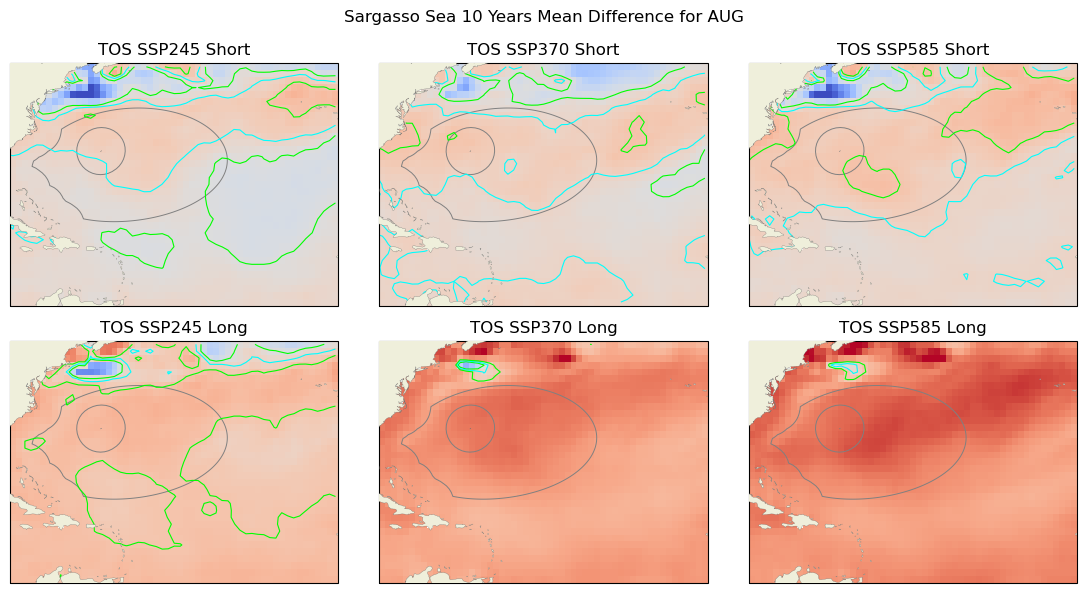

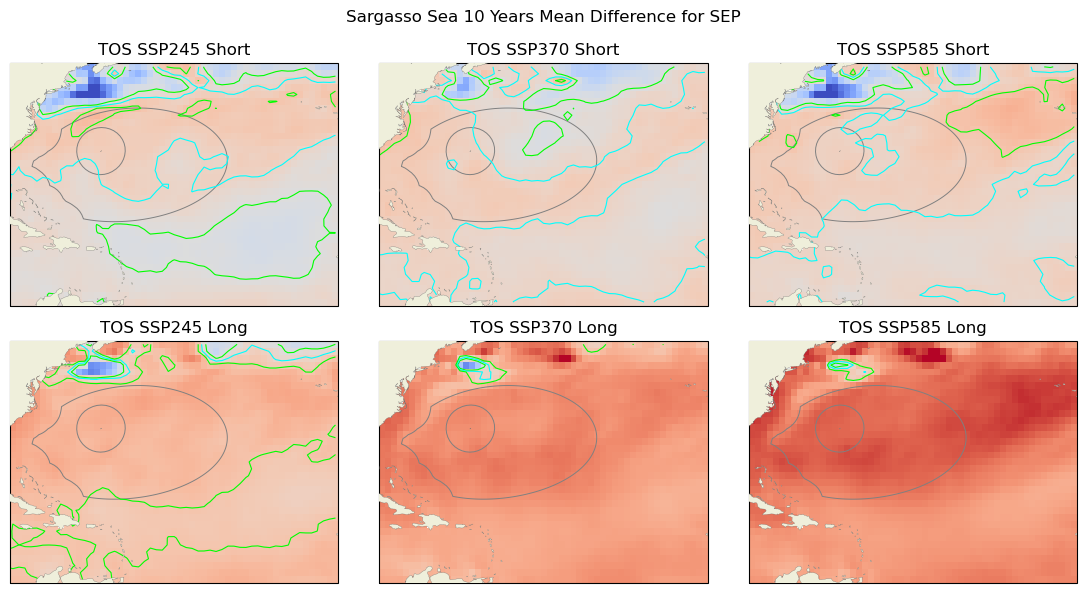

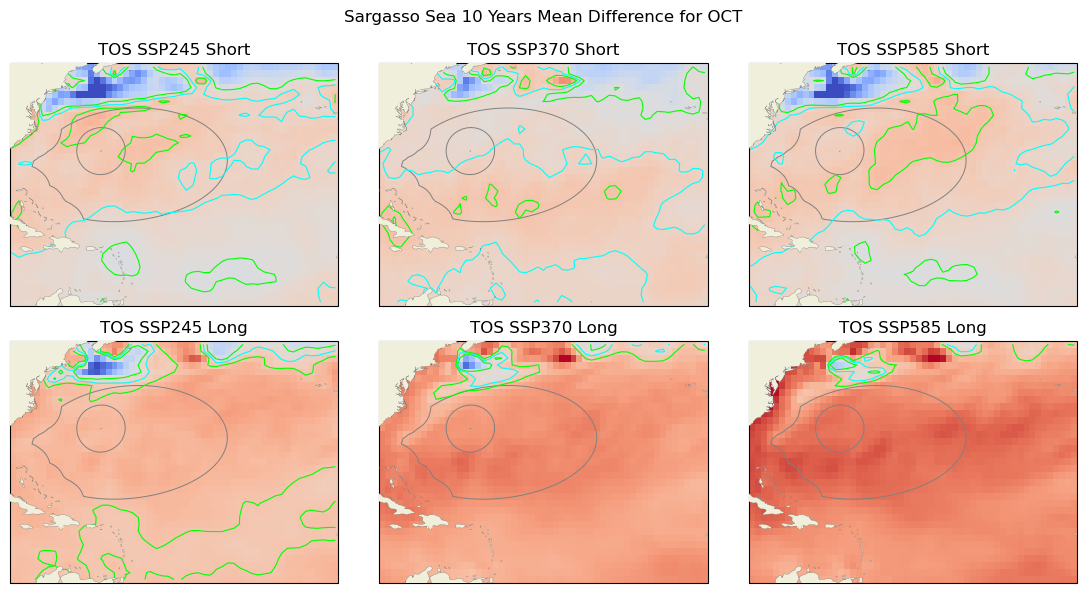

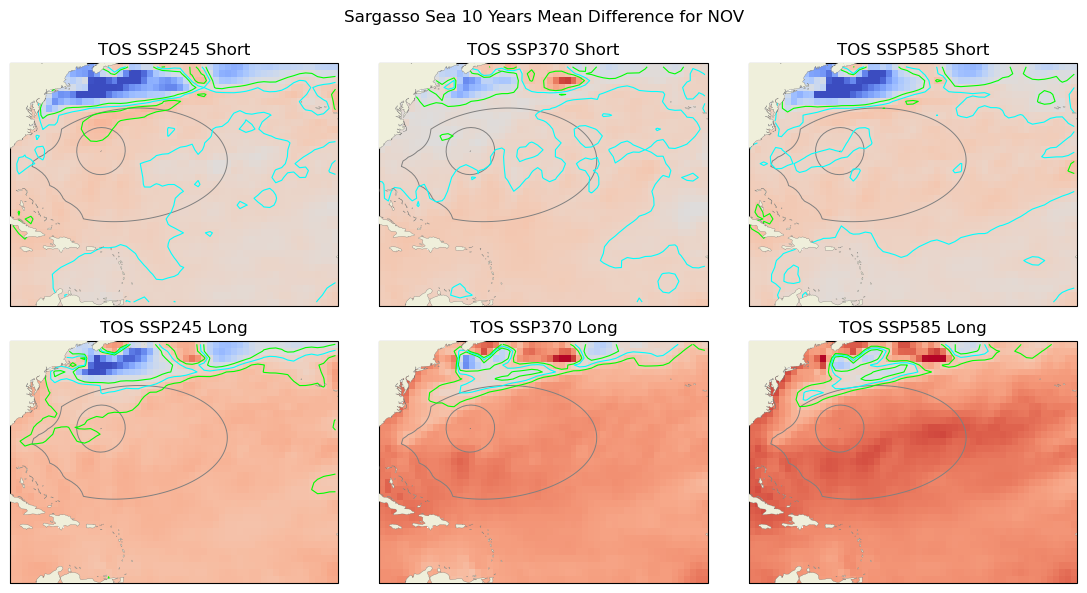

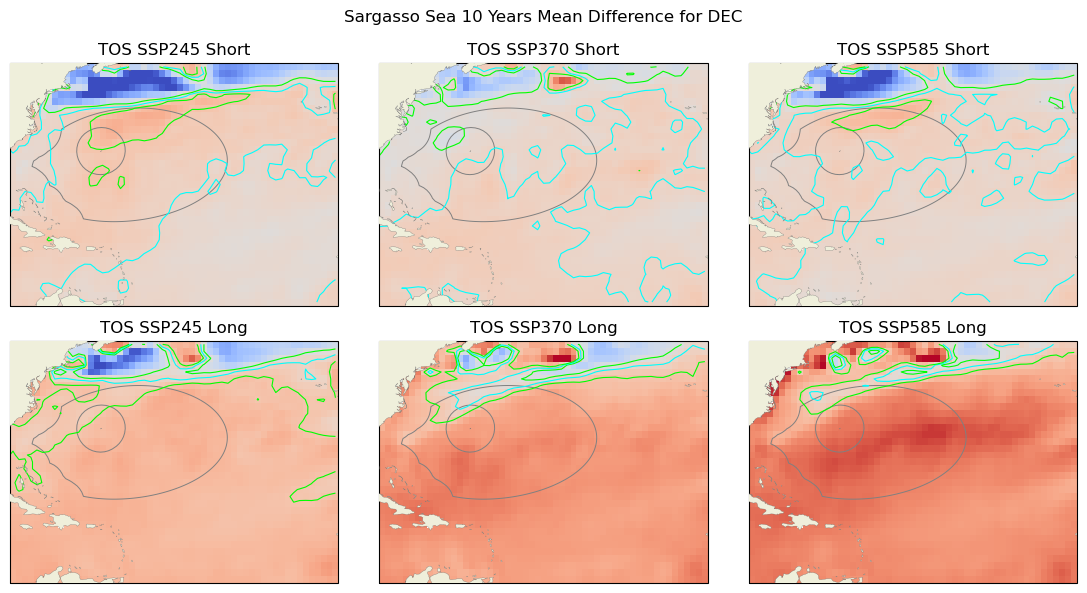

In [102]:
# automate plotting process
# read 12 months of data
months = {
    'jan': 1,
    'feb': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'aug': 8, 
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

for month in months.keys():
    # read sargasso tos data files for each month
    path = f"../data/tos/sargasso/{month}/"
    
    # read SSP245
    short_245 = xr.open_rasterio(path + f"sargasso_{month}_sst245_short_diff.tiff")
    short_245 = short_245.to_dataset('band')
    short_245 = short_245.rename({1:'tos'})
    short_245 = short_245.rio.write_crs(4326, inplace=True)

    long_245 = xr.open_rasterio(path + f"sargasso_{month}_sst245_long_diff.tiff")
    long_245 = long_245.to_dataset('band')
    long_245 = long_245.rename({1:'tos'})
    long_245 = long_245.rio.write_crs(4326, inplace=True)

    # read SSP370
    short_370 = xr.open_rasterio(path + f"sargasso_{month}_sst370_short_diff.tiff")
    short_370 = short_370.to_dataset('band')
    short_370 = short_370.rename({1:'tos'})
    short_370 = short_370.rio.write_crs(4326, inplace=True)

    long_370 = xr.open_rasterio(path + f"sargasso_{month}_sst370_long_diff.tiff")
    long_370 = long_370.to_dataset('band')
    long_370 = long_370.rename({1:'tos'})
    long_370 = long_370.rio.write_crs(4326, inplace=True)

    # read SSP585
    short_585 = xr.open_rasterio(path + f"sargasso_{month}_sst585_short_diff.tiff")
    short_585 = short_585.to_dataset('band')
    short_585 = short_585.rename({1:'tos'})
    short_585 = short_585.rio.write_crs(4326, inplace=True)

    long_585 = xr.open_rasterio(path + f"sargasso_{month}_sst585_long_diff.tiff")
    long_585 = long_585.to_dataset('band')
    long_585 = long_585.rename({1:'tos'})
    long_585 = long_585.rio.write_crs(4326, inplace=True)
    
    # after reading the files, plot maps
    fig_title = f'Sargasso Sea 10 Years Mean Difference for {month.upper()}'
    datasets = [short_245, short_370, short_585, long_245, long_370, long_585]
    title = ["TOS SSP245 Short", "TOS SSP370 Short", "TOS SSP585 Short",
             "TOS SSP245 Long", "TOS SSP370 Long", "TOS SSP585 Long"]
    fig = plot(datasets, title, fig_title)
    
    save_path = '../outputs/sargasso/'
    fig_name = f"sargasso_tos_10_years_mean_diff_{month}.jpg"
    fig.savefig(save_path + fig_name)

# Backup codes

In [31]:
"""
c_colors = ['lime','aqua']

fig = plt.figure(figsize=(10,6), tight_layout=True)
title_text = "Sargasso Sea 10 Years Mean Difference"
fig.suptitle(title_text)

# SST245 Short
ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=10)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)

short_245.tos.plot(cmap="plasma", vmin=0, vmax=2, add_colorbar=False)
CS = short_245[0].plot.contour(levels=[0.5,1,0], colors=c_colors, linewidths=.8, add_labels=True)

eez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.5, ax=ax1)
gac.plot(edgecolor="darkorange", facecolor="none", linewidth=0.7, ax=ax1) 

ax1.set_xlim(-80, -25) 
ax1.set_ylim(10,45)
ax1.set_title("SST245 Short")


# SST370 Short
ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=10)
ax2.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)

short_370.plot(cmap="plasma", vmin=0, vmax=2, add_colorbar=False)
short_370[0].plot.contour(levels=[0.7,0.4,0], colors=c_colors, linewidths=.8)

eez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.5, ax=ax2)
gac.plot(edgecolor="darkorange", facecolor="none", linewidth=0.7, ax=ax2) 

ax2.set_xlim(-80, -25) 
ax2.set_ylim(10, 45)
ax2.set_title("SST370 Short")


# SST585 Short
ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=10)
ax3.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)

short_585.plot(cmap="plasma", vmin=0, vmax=2, add_colorbar=False)
short_585[0].plot.contour(levels=[0.7,0.4,0], colors=c_colors, linewidths=.8)

eez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.5, ax=ax3)
gac.plot(edgecolor="darkorange", facecolor="none", linewidth=0.7, ax=ax3) 

ax3.set_xlim(-80, -25) 
ax3.set_ylim(10, 45)
ax3.set_title("SST585 Short")

# SST245 Long
ax4 = fig.add_subplot(2,3,4, projection=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=10)
ax4.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)

long_245.plot(cmap="plasma", vmin=0, vmax=2, add_colorbar=False)
long_245[0].plot.contour(levels=[0.7,0.4,0], colors=c_colors, linewidths=.8)

eez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.5, ax=ax4)
gac.plot(edgecolor="darkorange", facecolor="none", linewidth=0.7, ax=ax4) 

ax4.set_xlim(-80, -25) 
ax4.set_ylim(10, 45)
ax4.set_title("SST245 Long")

# SST370 Long
ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=10)
ax5.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)

long_370.plot(cmap="plasma", vmin=0, vmax=2, add_colorbar=False)
long_370[0].plot.contour(levels=[0.7,0.4,0], colors=c_colors, linewidths=.8)

eez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.5, ax=ax5)
gac.plot(edgecolor="darkorange", facecolor="none", linewidth=0.7, ax=ax5) 

ax5.set_xlim(-80, -25) 
ax5.set_ylim(10, 45)
ax5.set_title("SST370 Long")

# SST585 Long
ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=10)
ax6.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)

long_585.plot(cmap="plasma", vmin=0, vmax=2, add_colorbar=False)
long_585[0].plot.contour(levels=[0.5,1,0], colors=c_colors, linewidths=.8)

eez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.5, ax=ax6)
gac.plot(edgecolor="darkorange", facecolor="none", linewidth=0.7, ax=ax6) 

ax6.set_xlim(-80, -25) 
ax6.set_ylim(10, 45)
ax6.set_title("SST585 Long")

"""

'\nc_colors = [\'lime\',\'aqua\']\n\nfig = plt.figure(figsize=(10,6), tight_layout=True)\ntitle_text = "Sargasso Sea 10 Years Mean Difference"\nfig.suptitle(title_text)\n\n# SST245 Short\nax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())\nax1.add_feature(cfeature.LAND, zorder=10)\nax1.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)\n\nshort_245.tos.plot(cmap="plasma", vmin=0, vmax=2, add_colorbar=False)\nCS = short_245[0].plot.contour(levels=[0.5,1,0], colors=c_colors, linewidths=.8, add_labels=True)\n\neez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.5, ax=ax1)\ngac.plot(edgecolor="darkorange", facecolor="none", linewidth=0.7, ax=ax1) \n\nax1.set_xlim(-80, -25) \nax1.set_ylim(10,45)\nax1.set_title("SST245 Short")\n\n\n# SST370 Short\nax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())\nax2.add_feature(cfeature.LAND, zorder=10)\nax2.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)\n\nshort_370.plo